## Sales Prediction - Big Mart Outlets

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

#### Train file - CSV containing the item outlet information with sales value

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.


### Exploratory Data Analysis

In [88]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

train_data = pd.read_csv('Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0CCB85E08>,
      dtype=object)

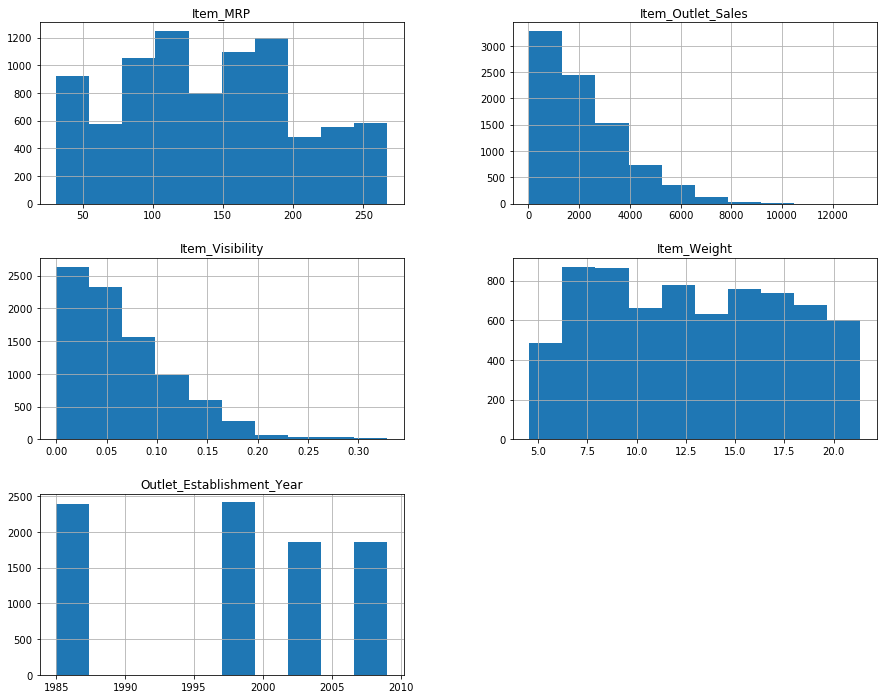

In [90]:
train_data.hist(figsize=(15,12))

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Observation: 
Item_Weight and Outlet_Size columns contain missing values

In [92]:
# Correlation between target and feature variables
corr_matrix = train_data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

##### Observation:
Of all the numerical features, Item_MRP seems to be have a good correlation with target variablle Item_Outlet_Sales

In [93]:
train_data.Item_Identifier.value_counts()

FDG33    10
FDW13    10
NCL31     9
FDV38     9
FDX04     9
         ..
FDQ60     1
DRF48     1
FDN52     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

##### Observation:
From the above output we can say that Item_Identifier should be a categorical variable

Since Item_Weight column correlation strength is very low, can be dropped from the dataset

In [94]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

##### Observation:
LF and low fat belong to same category - Low Fat

reg belong to Regular category

In [95]:
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('LF', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('low fat', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('reg','Regular')

train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [96]:
# Convert object column types to category type

train_data.Item_Identifier = train_data.Item_Identifier.astype('category')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.astype('category')
train_data.Item_Type = train_data.Item_Type.astype('category')
train_data.Outlet_Identifier = train_data.Outlet_Identifier.astype('category')
train_data.Outlet_Size = train_data.Outlet_Size.astype('category')
train_data.Outlet_Location_Type = train_data.Outlet_Location_Type.astype('category')
train_data.Outlet_Type = train_data.Outlet_Type.astype('category')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   category
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   category
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   category
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   category
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   category
 9   Outlet_Location_Type       8523 non-null   category
 10  Outlet_Type                8523 non-null   category
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 453.4 KB


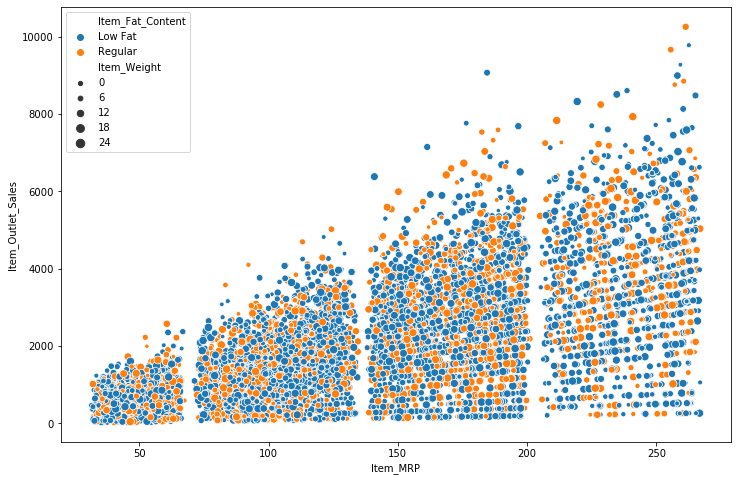

In [97]:
# Correlation strength of column Item_MRP with column Item_Outlet_Sales is very high
# Exploit Item_MRP column for further information about target column

fig, axes = plt.subplots(1, 1, figsize=(12,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', size='Item_Weight', data=train_data)

##### Observation: 
ITEM_MRP column contain prices which are in clusters. It would be better if we convert this columnn into bins for further processing.

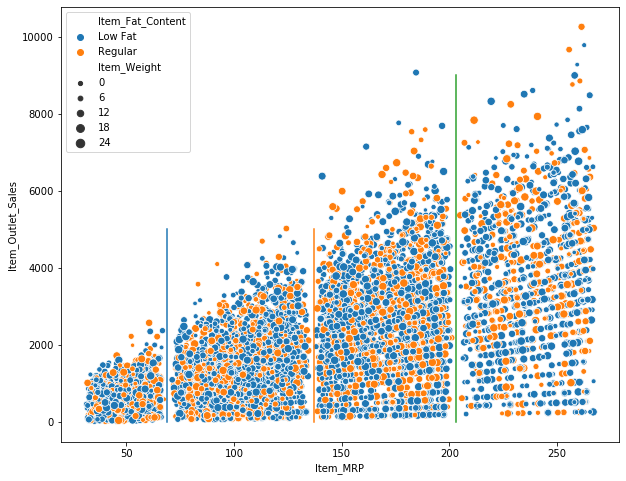

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', size='Item_Weight', data=train_data)
plt.plot([69, 69],[0, 5000])
plt.plot([137, 137],[0, 5000])
plt.plot([203, 203],[0, 9000])

##### Observation: 
The perpendicular lines can be used to divide data into proper bins.
From the above graph we got bin value.

In [99]:
train_data.Item_MRP = pd.cut(train_data.Item_MRP, bins=[25, 69, 137, 203, 270], labels=['a', 'b', 'c', 'd'], right=True)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


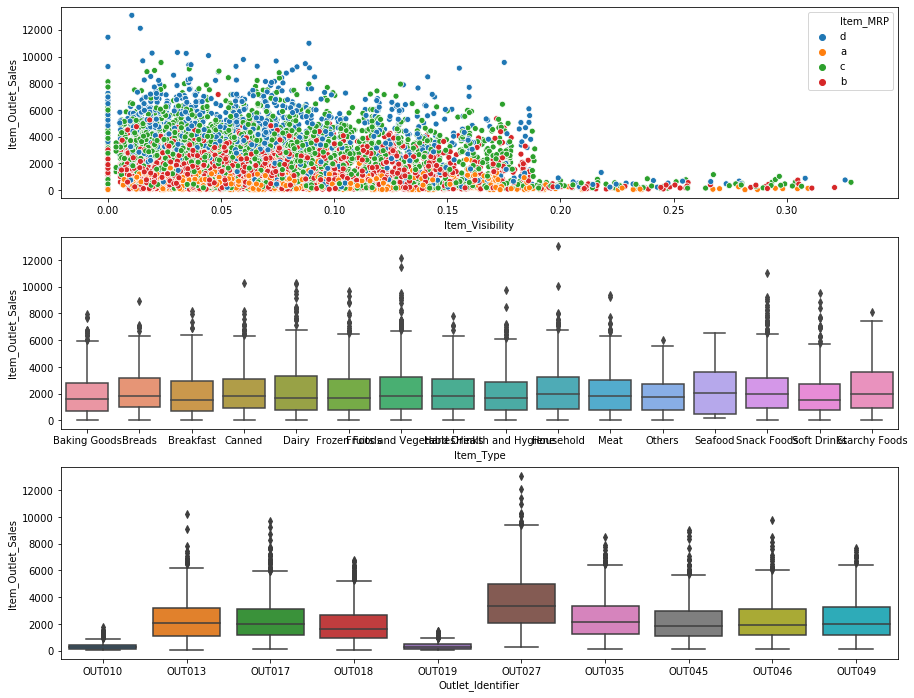

In [100]:
# Explore other columns

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_MRP', ax=axes[0], data=train_data)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', ax=axes[1], data=train_data)
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', ax=axes[2], data=train_data)

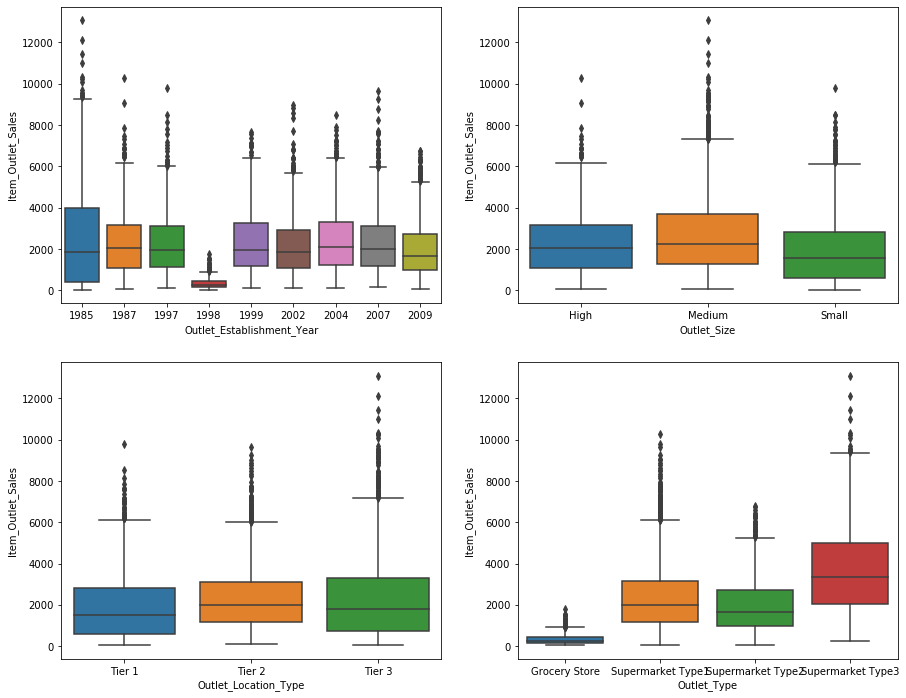

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=axes[0,0], data=train_data)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0,1], data=train_data)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[1,0], data=train_data)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1,1], data=train_data)

##### Observation:
From above plots we can say that we can drop Item_Visibility along with Item_Weight.
These columns have very low correlation strength with target column. 

In [102]:
# Columns for model training

attributes = ['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier',
              'Item_Type','Item_Outlet_Sales']

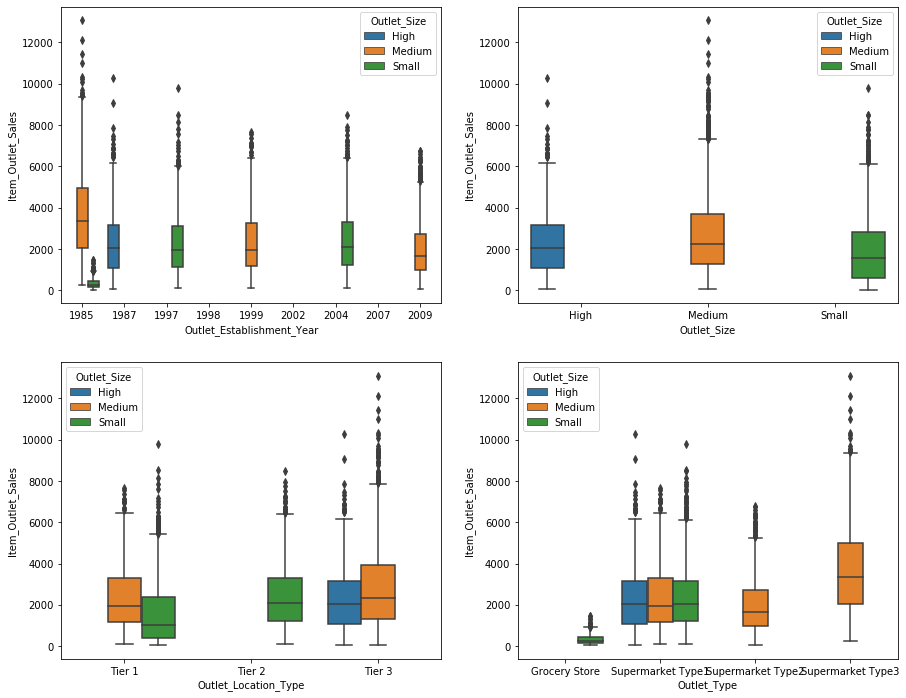

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[0,0], data=train_data)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[0,1], data=train_data)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[1,0], data=train_data)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', ax=axes[1,1], data=train_data)

In [104]:
data = train_data[attributes]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                6113 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


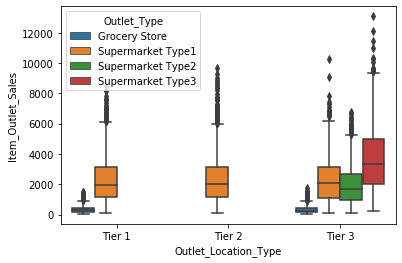

In [105]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)

In [106]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232


##### Observation:
When Outlet_Type is Supermarket Type1 and Outlet_Location_Type is Tier 2, Outlet_Size is null 

When Outlet_Type is Grocery and Outlet_Location_Type is Tier 3, Outlet_Size is null

In [107]:
data.groupby(['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Size  Outlet_Type        Outlet_Identifier
Tier 1                Medium       Supermarket Type1  OUT049               930
                      Small        Grocery Store      OUT019               528
                                   Supermarket Type1  OUT046               930
Tier 2                Small        Supermarket Type1  OUT035               930
Tier 3                High         Supermarket Type1  OUT013               932
                      Medium       Supermarket Type2  OUT018               928
                                   Supermarket Type3  OUT027               935
Name: Outlet_Identifier, dtype: int64

##### Observation:
Tier 1 have Small and Medium size stores

Tier 2 have only Small stores

Tier 3 have Medium and High size stores

In [108]:
data.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [109]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [110]:
data['Outlet_Size'].isnull().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [111]:
# data.apply(lambda x: len(x.unique()))

data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]), inplace=True)

#### Outliers

In [112]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,Medium,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


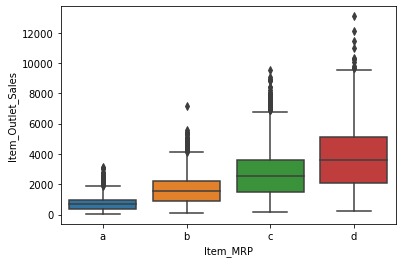

In [113]:
sns.boxplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

In [114]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.describe()

count    2751.000000
mean     1615.644414
std      1002.562854
min        73.238000
25%       885.514000
50%      1523.350400
75%      2181.160800
max      7158.681600
Name: Item_Outlet_Sales, dtype: float64

In [115]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,Medium,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,Medium,1985,OUT027,Household,7158.6816


In [116]:
data.iloc[7796,7:] = data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].median()
data.iloc[7796,7:]

Item_Outlet_Sales    1523.35
Name: 7796, dtype: object

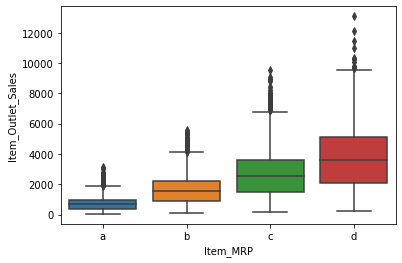

In [117]:
# Outliers fixed 
sns.boxplot(x='Item_MRP', y='Item_Outlet_Sales', data=data)

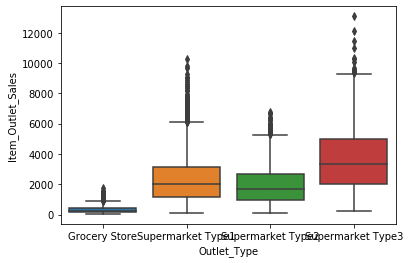

In [118]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)

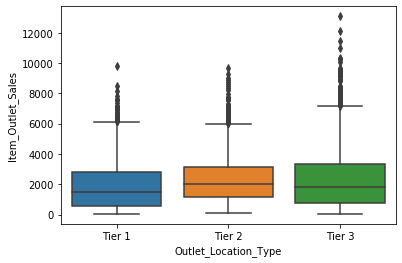

In [119]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

In [120]:
data[data.Outlet_Location_Type == 'Tier 1'].Item_Outlet_Sales.describe()

count    2388.000000
mean     1876.909159
std      1561.649293
min        33.955800
25%       593.727150
50%      1487.397200
75%      2803.018000
max      9779.936200
Name: Item_Outlet_Sales, dtype: float64

In [121]:
data[data.Item_Outlet_Sales==9779.936200]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,Small,1997,OUT046,Health and Hygiene,9779.9362


In [122]:
data.iloc[4289,7:] = data.groupby('Outlet_Location_Type').get_group('Tier 1')['Item_Outlet_Sales'].median()
data.iloc[4289,7:]

Item_Outlet_Sales    1487.4
Name: 4289, dtype: object

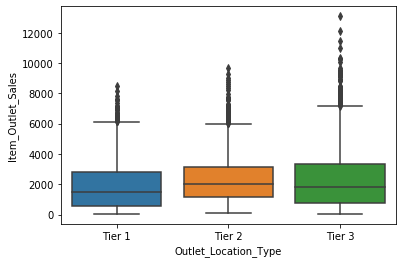

In [123]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)

In [124]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,Medium,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,Medium,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,Medium,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,Medium,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,High,1987,OUT013,Household,994.7052


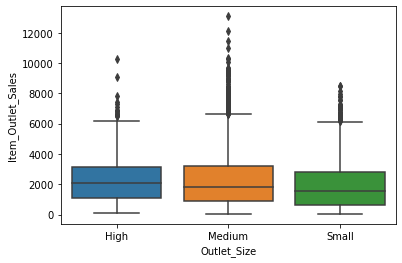

In [125]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

In [126]:
data[data.Outlet_Size=='High'].Item_Outlet_Sales.describe()

count      932.000000
mean      2298.995256
std       1533.531664
min         73.238000
25%       1072.603800
50%       2050.664000
75%       3166.378350
max      10256.649000
Name: Item_Outlet_Sales, dtype: float64

In [127]:
data[data.Item_Outlet_Sales==10256.649000]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4888,d,Supermarket Type1,Tier 3,High,1987,OUT013,Dairy,10256.649


In [128]:
data.iloc[4888,7:] = data.groupby('Outlet_Size').get_group('High')['Item_Outlet_Sales'].median()
data.iloc[4888,7:]

Item_Outlet_Sales    2050.66
Name: 4888, dtype: object

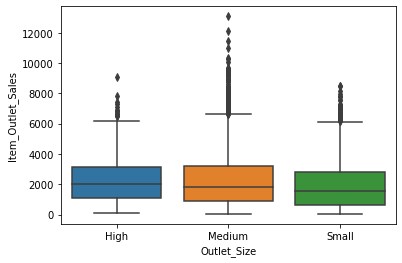

In [129]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data)

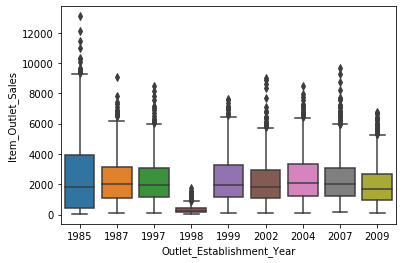

In [130]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data)

In [131]:
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

In [132]:
data_label = data.Item_Outlet_Sales # y
data_dummy = pd.get_dummies(data.iloc[:,0:6]) # X


In [133]:
data_dummy['Item_Outlet_Sales'] = data_label
print(data_dummy.shape) # X
data_dummy.head()

(8523, 34)


,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Outlet_Sales
0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3735.1380
1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,443.4228
2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2097.2700
3,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,732.3800
4,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,994.7052


### Applying ML Algorithms

In [134]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_dummy, test_size=0.20, random_state=2019)
train.shape, test.shape

((6818, 34), (1705, 34))

In [135]:
train_label = train['Item_Outlet_Sales']
test_label = test['Item_Outlet_Sales']

del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

#### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train, train_label)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
from sklearn.metrics import mean_squared_error

predict_lr = linear_reg.predict(test)
mse = mean_squared_error(test_label, predict_lr)
lr_score = np.sqrt(mse)
lr_score

1146.0684125843102

In [138]:
# Cross validation for linear regression

from sklearn.model_selection import cross_val_score

score = cross_val_score(linear_reg, train, train_label, cv=10, scoring='neg_mean_squared_error')
lr_score_cross = np.sqrt(-score)

np.mean(lr_score_cross), np.std(lr_score_cross)

(1154.0860670390878, 34.776072966511805)

#### Ridge Regression

In [139]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.05, solver='cholesky')
r.fit(train, train_label)

predict_r = r.predict(test)
mse = mean_squared_error(test_label, predict_r)
r_score = np.sqrt(mse)
r_score

1144.4999184008745

In [140]:
# Cross validation Ridge
r = Ridge(alpha=0.05, solver='cholesky')
score = cross_val_score(r, train, train_label, cv=10, scoring='neg_mean_squared_error')
r_score_cross = np.sqrt(-score)
np.mean(r_score_cross), np.std(r_score_cross)

(1152.3581942626045, 35.51618586214093)

#### Lasso Regression

In [141]:
from sklearn.linear_model import Lasso

l = Lasso(alpha=0.01)
l.fit(train, train_label)

predict_l = l.predict(test)
mse = mean_squared_error(test_label, predict_l)
l_score = np.sqrt(mse)
l_score

1144.5001955687896

In [142]:
# Cross validation Lasso

l = Lasso(alpha=0.01)
score = cross_val_score(l, train, train_label, cv=10, scoring='neg_mean_squared_error')
l_score_cross = np.sqrt(-score)
np.mean(l_score_cross), np.std(l_score_cross)

(1152.3581337713208, 35.51628436576452)

#### Decision Tree Regressor

In [143]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train, train_label)

predict_r = dtr.predict(test)
mse = mean_squared_error(test_label, predict_r)
dtr_score = np.sqrt(mse)
dtr_score

1106.4219212663597

In [144]:
# Cross validation Decision Tree

dtr = DecisionTreeRegressor()
score = cross_val_score(dtr, train, train_label, cv=10, scoring='neg_mean_squared_error')
dtr_score_cross = np.sqrt(-score)
np.mean(dtr_score_cross), np.std(dtr_score_cross)

(1099.3154825526046, 34.29415811708023)

#### Random Forest

In [145]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train, train_label)
predict_rf = rf.predict(test)
mse = mean_squared_error(test_label, predict_rf)
rf_score = np.sqrt(mse)
rf_score

1106.7816423769573

In [146]:
# Cross validation Random Forest

rf = RandomForestRegressor()
score = cross_val_score(rf, train, train_label, cv=10, scoring='neg_mean_squared_error')
rf_score_cross = np.sqrt(-score)
np.mean(rf_score_cross), np.std(rf_score_cross)

(1099.2693374149826, 34.473736327511155)

#### Bagging Regression

In [147]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(max_samples=70)
br.fit(train, train_label)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=70, n_estimators=10, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [148]:
predict_br = br.predict(test)
br_score = mean_squared_error(test_label, predict_br)
br_score = np.sqrt(br_score)
br_score

1156.2293839789324

In [149]:
# Cross validation Bagging

br = BaggingRegressor()
score = cross_val_score(br, train, train_label, cv=10, scoring='neg_mean_squared_error')
br_score_cross = np.sqrt(-score)
np.mean(br_score_cross), np.std(br_score_cross)

(1099.9322796480424, 34.704428315562815)

#### Adaptive Boosting

In [150]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(train, train_label)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [151]:
predict_ada = ada.predict(test)
ada_score = mean_squared_error(test_label, predict_ada)
ada_score = np.sqrt(ada_score)
ada_score

1170.6184645553667

In [152]:
# Cross validation AdaBoostRegression

ada = AdaBoostRegressor()
score = cross_val_score(ada, train, train_label, cv=10, scoring='neg_mean_squared_error')
ada_score_cross = np.sqrt(-score)
np.mean(ada_score_cross), np.std(ada_score_cross)

(1158.2564891878496, 37.21560386240555)

#### Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train, train_label)
predict_gbr = gbr.predict(test)
gb_score = mean_squared_error(test_label, predict_gbr)
gb_score = np.sqrt(gb_score)
gb_score

1106.0633205219578

In [154]:
# Cross validation Gradient Boosting

gb = GradientBoostingRegressor()
score = cross_val_score(gb, train, train_label, cv=10, scoring='neg_mean_squared_error')
gb_score_cross = np.sqrt(-score)
np.mean(gb_score_cross), np.std(gb_score_cross)

(1098.80871464265, 34.14871661116322)

### Stats

In [155]:
techniques = ['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost',
              'Ada Boost CV','Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

score_df = pd.DataFrame({'model': [lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,dtr_score,dtr_score_cross,
                                   rf_score,rf_score_cross,ada_score,ada_score_cross,br_score,br_score_cross, 
                                   gb_score,gb_score_cross]}, index=techniques)

score_df['model'] = score_df.applymap(lambda x: x.mean())
score_df.model.sort_values()

Gradient Boost CV           1098.808715
Random Forest CV            1099.269337
Decision Tree Regression    1099.315483
Bagging CV                  1099.932280
Gradient Boost              1106.063321
Decision Tree               1106.421921
Random Forest               1106.781642
Ridge Regression            1144.499918
Lasso Regression            1144.500196
Linear Regression           1146.068413
Lasso Regression CV         1152.358134
Ridge Regression CV         1152.358194
Linear Regression CV        1154.086067
Bagging                     1156.229384
Ada Boost CV                1158.256489
Ada Boost                   1170.618465
Name: model, dtype: float64

### Hyper Parameter tuning - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=7, n_estimators=200, learning_rate=0.01)

param = [{'min_samples_split':[5,9,13], 'max_leaf_nodes':[3,5,7,9], 'max_features':[8,10,15,18]}]

gs = GridSearchCV(gb, param, cv=5, scoring='neg_mean_squared_error')
gs.fit(train, train_label)



In [ ]:
gs.best_estimator_

In [ ]:
gb = gs.best_estimator_

In [ ]:
total = pd.concat([train,test], axis=0, ignore_index=True)

total_label = pd.concat([train_label, test_label], axis=0, ignore_index=True)

total_label.shape, total.shape

In [ ]:
gb.fit(total, total_label)

### Test Data

In [ ]:
test = pd.read_csv('Test.csv')
test.shape

In [ ]:
# Test data Columns for model training

attributes = ['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier',
              'Item_Type']

test = test[attributes]
test.shape

In [ ]:
test.info()

In [ ]:
test.Item_MRP = pd.cut(test.Item_MRP, bins=[25,75,140,205,270], labels=['a','b','c','d'],right=True)

test.Item_Type = test.Item_Type.astype('category')

test.Outlet_Size = test.Outlet_Size.astype('category')

test.Outlet_Identifier = test.Outlet_Identifier.astype('category')

test.Outlet_Type = test.Outlet_Type.astype('category')

test.Outlet_Location_Type = test.Outlet_Location_Type.astype('category')

test.Outlet_Establishment_Year = test.Outlet_Establishment_Year.astype('category')

test.info()

In [ ]:
test.Outlet_Size.isnull().value_counts()

In [ ]:
test['Outlet_Size'].fillna((test['Outlet_Size'].mode()[0]), inplace=True)

In [ ]:
test.Outlet_Size.isnull().value_counts()

In [ ]:
test_dummy = pd.get_dummies(test.iloc[:,0:6])

test_dummy.head()

### Predict the Item outlet sales for Test data

In [ ]:
predict = gb.predict(test_dummy)

predict.shape

In [ ]:
sample = pd.read_csv('Submission.csv')

sample.head()

In [ ]:
del sample['Item_Outlet_Sales']

In [ ]:
predict_df = pd.DataFrame({'Item_Outlet_Sales': predict})
pred_values = pd.concat([sample, predict_df], axis=1)
pred_values.head()

In [ ]:
pred_values.to_csv('sales-prediction-submission.csv')

In [ ]:
output_df = pd.read_csv('sales-prediction-submission.csv')
output_df.head()